In [1]:
#웹 크롤링을 쉽게 해주는 BeautifulSoup
#크롤링: 웹 사이트의 HTML문서에서 필요한 정보를 수집하는 것
#스크래이핑: 실제 HTML만을 이용해 수집하는 것(크롤링의 일종)

#Anaconda 설치 시 BeautifulSoup 라이브러리가 자동으로 포함됨
from bs4 import BeautifulSoup
from urllib.request import urlopen

page = urlopen('http://www.mnet.com/chart/TOP100/') #url의 페이지(html) 불러오기
page2 = urlopen('http://www.mnet.com/chart/TOP100/2018031317?pNum=2')

soup = BeautifulSoup(page, 'html.parser')
soup2 = BeautifulSoup(page2, 'html.parser')

song_list = soup.find(class_='MMLTable jQMMLTable').table.tbody.find_all('tr')
song_list

song_list2 = soup2.find(class_='MMLTable jQMMLTable').table.tbody.find_all('tr')
song_list2

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


[<tr>
 <td class="MMLItemCheck"><input id="" name="songIdx" title="다른사람을 사랑하고 있어 - 선택" type="checkbox" value="29438397"/></td>
 <td class="MMLItemRank"><div class="MMLIRankNum_Box"><span class="MMLI_RankNum MMLI_RankNum_51">51위</span></div><td class="MMLItemUpdown"><div class="MMLIUpdown_Box"><span class="MMLI_Updown MMLI_Updown_Down">상승</span><span class="MMLI_UpdownNum">15</span></div></td></td>
 <td class="MMLItemTitle">
 <div class="MMLITitle_Wrap">
 <div class="MMLITitle_Album">
 <a href="/album/2779423 " target="_self"><img alt="Faces of Love - 앨범" onerror="javascript:mnetImage.fnSetClipUrl(this, '0202' , '2779423', '50')" src="http://cmsimg.mnet.com/clipimage/album/50/002/779/2779423.jpg"/><span class="photoLine"></span></a>
 </div>
 <div class="MMLITitle_Box info">
 <div class="MMLITitleSong_Box">
 <a class="MMLI_SongInfo" href="/track/29438397" target="_self">다른사람을 사랑하고 있어 - 곡정보</a><a class="MMLI_Song" href="javascript:mnetCom.aodPlay('29438397');" title="다른사람을 사랑하고 있어 새창">다른사

In [2]:
mnet=[]

for song in song_list:
    
    rank= song.find('span', class_='MMLI_RankNum').get_text().strip('위')
    num= song.find('td', class_='MMLItemUpdown').get_text()
    song_name= song.find('a', class_='MMLI_Song').get_text()
    singer= song.find('a', class_='MMLIInfo_Artist').get_text()
    album= song.find('a', class_='MMLIInfo_Album').get_text()
    
    page3 = song.find('a')['href']
    page3 = urlopen('http://www.mnet.com' + page3)
    soup3 = BeautifulSoup(page3, 'html.parser')
    s_date= soup3.find('dd').find_all('p')[1].find(class_='right').get_text()
    s_date
    
    
    num=num.replace('보합0','0')
    num=num.replace('상승','')
    num=num.replace('하락','')
    if num == '신규진입':
        num=0    
    mnet.append([int(rank), int(num), song_name, singer, album, s_date])
    
    print('순위: ', rank)
    print('등락: ', num)
    print('곡: ', song_name)
    print('가수: ', singer)
    print('앨범: ', album)
    print('발매일: ', s_date)
    print()
    
for song in song_list2:
    
    rank= song.find('span', class_='MMLI_RankNum').get_text().strip('위')
    num= song.find('td', class_='MMLItemUpdown').get_text()
    song_name= song.find('a', class_='MMLI_Song').get_text()
    singer= song.find('a', class_='MMLIInfo_Artist').get_text()
    album= song.find('a', class_='MMLIInfo_Album').get_text()
    
    page3 = song.find('a')['href']
    page3 = urlopen('http://www.mnet.com' + page3)
    soup3 = BeautifulSoup(page3, 'html.parser')
    s_date= soup3.find('dd').find_all('p')[1].find(class_='right').get_text()
    s_date
    
    num=num.replace('보합0','0')
    num=num.replace('상승','')
    num=num.replace('하락','')
    if num == '신규진입':
        num=0
    
    mnet.append([int(rank), int(num), song_name, singer, album, s_date])
    
    print('순위: ', rank)
    print('등락: ', num)
    print('곡: ', song_name)
    print('가수: ', singer)
    print('앨범: ', album)
    print('발매일: ', s_date)
    print()

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  1
등락:  1
곡:  Look
가수:  GOT7 (갓세븐)
앨범:  Eyes On You
발매일:  2018.03.12



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  2
등락:  0
곡:  꽃 길
가수:  BIGBANG
앨범:  꽃 길
발매일:  2018.03.13



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  3
등락:  2
곡:  Jenga (Feat. Gaeko)
가수:  헤이즈(Heize)
앨범:  바람
발매일:  2018.03.08



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  4
등락:  1
곡:  별이 빛나는 밤
가수:  마마무(Mamamoo)
앨범:  Yellow Flower
발매일:  2018.03.07



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  5
등락:  1
곡:  내가 더 나빠
가수:  헤이즈(Heize)
앨범:  바람
발매일:  2018.03.08



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  6
등락:  1
곡:  사랑을 했다 (LOVE SCENARIO)
가수:  iKON
앨범:  Return
발매일:  2018.01.25



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  7
등락:  2
곡:  뿜뿜
가수:  모모랜드(MOMOLAND)
앨범:  GREAT!
발매일:  2018.01.03



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  8
등락:  5
곡:  Roller Coaster
가수:  청하
앨범:  Offset
발매일:  2018.01.17



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  9
등락:  1
곡:  You
가수:  멜로망스(Melomance)
앨범:  투유 프로젝트 - 슈가맨2 Part 2
발매일:  2018.01.22



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  10
등락:  1
곡:  그때 헤어지면 돼
가수:  로이킴
앨범:  그때 헤어지면 돼
발매일:  2018.02.12



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  11
등락:  3
곡:  너 하나만 (Feat. 효린)
가수:  GOT7 (갓세븐)
앨범:  Eyes On You
발매일:  2018.03.12



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  12
등락:  1
곡:  약속해요 (I.P.U.)
가수:  Wanna One(워너원)
앨범:  약속해요 (I.P.U.) - Special Theme Track
발매일:  2018.03.05



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  13
등락:  7
곡:  HandClap
가수:  Fitz & The Tantrums
앨범:  Fitz and The Tantrums (Deluxe)
발매일:  2017.07.28



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  14
등락:  0
곡:  괜찮냐고 
가수:  헤이즈(Heize)
앨범:  바람
발매일:  2018.03.08



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  15
등락:  0
곡:  이 별
가수:  길구봉구
앨범:  Star
발매일:  2017.09.18



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  16
등락:  4
곡:  Bad Boy
가수:  Red Velvet (레드벨벳)
앨범:  The Perfect Red Velvet - The 2nd Album Repackage
발매일:  2018.01.29



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  17
등락:  6
곡:  그날처럼
가수:  장덕철
앨범:  그날처럼
발매일:  2017.11.28



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  18
등락:  2
곡:  너 없는 시간들
가수:  다비치
앨범:  &10    
발매일:  2018.01.25



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  19
등락:  1
곡:  네가 없는 곳
가수:  양요섭
앨범:  YANG YOSEOP 2ND MINI ALBUM `白`
발매일:  2018.02.19



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  20
등락:  1
곡:  주인공
가수:  선미
앨범:  주인공
발매일:  2018.01.18



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  21
등락:  3
곡:  My Way
가수:  이수(엠씨더맥스) 
앨범:  돈꽃 OST Part 1
발매일:  2017.11.11



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  22
등락:  3
곡:  선물
가수:  멜로망스(Melomance)
앨범:  Moonlight
발매일:  2017.07.10



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  23
등락:  8
곡:  잘 살길 바래 (With DAVII)
가수:  헤이즈(Heize)
앨범:  바람
발매일:  2018.03.08



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  24
등락:  3
곡:  Heart Shaker
가수:  TWICE(트와이스)
앨범:  Merry & Happy
발매일:  2017.12.11



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  25
등락:  7
곡:  instagram
가수:  DEAN
앨범:  instagram
발매일:  2017.12.26



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  26
등락:  10
곡:  My Blossom
가수:  소유(SOYOU)
앨범:  My Blossom
발매일:  2018.03.12



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  27
등락:  18
곡:  밤이 되니까
가수:  펀치(Punch)
앨범:  밤이 되니까
발매일:  2017.09.29



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  28
등락:  11
곡:  눈사람
가수:  정승환
앨범:  그리고 봄
발매일:  2018.02.19



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  29
등락:  5
곡:  True Love
가수:  김성규
앨범:  1st Album `10 Stories`
발매일:  2018.02.26



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  30
등락:  1
곡:  눈 떠보니 이별이더라
가수:  포맨
앨범:  REMEMBER ME
발매일:  2017.10.24



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  31
등락:  1
곡:  기억의 빈자리
가수:  나얼
앨범:  기억의 빈자리
발매일:  2017.11.29



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  32
등락:  2
곡:  Beautiful
가수:  Wanna One(워너원)
앨범:  1-1=0 (NOTHING WITHOUT YOU)
발매일:  2017.11.13



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  33
등락:  755
곡:  all of my life
가수:  박원
앨범:  0M
발매일:  2017.07.27



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  34
등락:  8
곡:  #첫사랑
가수:  볼빨간사춘기
앨범:  #첫사랑
발매일:  2018.01.10



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  35
등락:  8
곡:  There`s Nothing Holdin` Me Back
가수:  Shawn Mendes
앨범:  Illuminate (New Deluxe Ver.)
발매일:  2017.04.21



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  36
등락:  758
곡:  밤편지
가수:  아이유(IU)
앨범:  밤편지
발매일:  2017.03.24



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  37
등락:  21
곡:  오늘밤도
가수:  펀치(Punch)
앨범:  오늘밤도
발매일:  2018.02.06



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  38
등락:  1
곡:  MIANHAE
가수:  헤이즈(Heize)
앨범:  바람
발매일:  2018.03.08



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  39
등락:  2
곡:  바람
가수:  헤이즈(Heize)
앨범:  바람
발매일:  2018.03.08



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  40
등락:  0
곡:  Grapevine (포도주) (Feat. 박재범)
가수:  Junoflo(주노플로)
앨범:  Only Human
발매일:  2018.03.13



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  41
등락:  5
곡:  불장난
가수:  BLACKPINK
앨범:  SQUARE TWO
발매일:  2016.11.01



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  42
등락:  0
곡:  망설이다
가수:  GOT7 (갓세븐)
앨범:  Eyes On You
발매일:  2018.03.12



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  43
등락:  0
곡:  Action! (Feat. GRAY)
가수:  DPR LIVE
앨범:  Action!
발매일:  2018.03.13



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  44
등락:  26
곡:  팔레트 (Feat. G-DRAGON)
가수:  아이유(IU)
앨범:  Palette
발매일:  2017.04.21



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  45
등락:  27
곡:  후유증
가수:  민경훈
앨범:  후유증
발매일:  2018.02.17



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  46
등락:  13
곡:  Love Letter (언약)
가수:  2Shai
앨범:  Love Letter
발매일:  2003.09.08



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  47
등락:  2
곡:  애쓰지 마요
가수:  박보람
앨범:  애쓰지 마요
발매일:  2018.02.13



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  48
등락:  5
곡:  Havana (Feat. Young Thug)
가수:  Camila Cabello
앨범:  Camila
발매일:  2018.01.12



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  49
등락:  21
곡:  비행운
가수:  문문(MoonMoon)
앨범:  LIFE IS BEAUTY FULL
발매일:  2016.11.10



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  50
등락:  12
곡:  Thunder
가수:  Imagine Dragons
앨범:  Evolve
발매일:  2018.02.22



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  51
등락:  15
곡:  다른사람을 사랑하고 있어
가수:  수지(SUZY)
앨범:  Faces of Love
발매일:  2018.01.29



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  52
등락:  3
곡:  우리
가수:  GOT7 (갓세븐)
앨범:  Eyes On You
발매일:  2018.03.12



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  53
등락:  2
곡:  고마워
가수:  GOT7 (갓세븐)
앨범:  Eyes On You
발매일:  2018.03.12



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  54
등락:  41
곡:  빈차 (Feat. 오혁)
가수:  에픽하이 (EPIK HIGH)
앨범:  WE'VE DONE SOMETHING WONDERFUL
발매일:  2017.10.23



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  55
등락:  19
곡:  너였다면
가수:  정승환
앨범:  또 오해영 OST Part 5
발매일:  2016.05.31



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  56
등락:  40
곡:  후유증
가수:  민경훈
앨범:  후유증
발매일:  2018.02.17



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  57
등락:  35
곡:  불장난
가수:  BLACKPINK
앨범:  SQUARE TWO
발매일:  2016.11.01



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  58
등락:  475
곡:  Closer (Feat. Halsey)
가수:  The Chainsmokers
앨범:  Collage EP
발매일:  2016.11.05



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  59
등락:  5
곡:  오늘 취하면 (Feat. 창모) (Prod. SUGA)
가수:  수란(Suran)
앨범:  WINE
발매일:  2017.04.27



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  60
등락:  1
곡:  애쓰지 마요
가수:  박보람
앨범:  애쓰지 마요
발매일:  2018.02.13



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  61
등락:  7
곡:  좋니
가수:  윤종신
앨범:  LISTEN 010 좋니
발매일:  2017.06.22



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  62
등락:  37
곡:  KNOCK KNOCK
가수:  TWICE(트와이스)
앨범:  TWICEcoaster : LANE 2
발매일:  2017.02.20



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  63
등락:  31
곡:  all of my life
가수:  박원
앨범:  0M
발매일:  2017.07.27



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  64
등락:  6
곡:  시차 (We Are) (Feat. 로꼬 & GRAY)
가수:  우원재
앨범:  시차 (We Are)
발매일:  2017.09.04



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  65
등락:  42
곡:  Shape of You
가수:  Ed Sheeran
앨범:  ÷ (Deluxe)
발매일:  2017.03.03



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  66
등락:  17
곡:  벚꽃 엔딩
가수:  버스커 버스커
앨범:  버스커 버스커
발매일:  2012.03.29



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  67
등락:  31
곡:  한숨
가수:  이하이
앨범:  SEOULITE
발매일:  2016.03.09



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  68
등락:  35
곡:  You Are
가수:  GOT7 (갓세븐)
앨범:  7 for 7
발매일:  2017.10.10



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  69
등락:  7
곡:  가시나
가수:  선미
앨범:  SUNMI SPECIAL EDITION `가시나`
발매일:  2017.08.22



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  70
등락:  27
곡:  그리워하다
가수:  비투비(BTOB)
앨범:  Brother Act.
발매일:  2017.10.16



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  71
등락:  13
곡:  우리도 그들처럼
가수:  XIA(준수)
앨범:  우리도 그들처럼
발매일:  2017.12.15



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  72
등락:  4
곡:  연애소설 (Feat. 아이유)
가수:  에픽하이 (EPIK HIGH)
앨범:  WE'VE DONE SOMETHING WONDERFUL
발매일:  2017.10.23



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  73
등락:  4
곡:  빨간 맛 (Red Flavor)
가수:  Red Velvet (레드벨벳)
앨범:  The Red Summer - Summer Mini Album
발매일:  2017.07.09



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  74
등락:  4
곡:  Something Just Like This
가수:  The Chainsmokers
앨범:  Memories...Do Not Open
발매일:  2017.04.07



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  75
등락:  31
곡:  REALLY REALLY
가수:  WINNER
앨범:  FATE NUMBER FOR
발매일:  2017.04.04



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  76
등락:  3
곡:  매일 듣는 노래 (A Daily Song)
가수:  황치열
앨범:  Be ordinary
발매일:  2017.06.13



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  77
등락:  39
곡:  그 사람을 아나요
가수:  임창정
앨범:  그 사람을 아나요
발매일:  2017.10.23



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  78
등락:  38
곡:  Tell Me
가수:  인피니트
앨범:  TOP SEED
발매일:  2018.01.08



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  79
등락:  17
곡:  이슬을 머금은 나무
가수:  XIA
앨범:  Tarantallegra
발매일:  2012.05.15



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  80
등락:  45
곡:  Love Yourself
가수:  Justin Bieber
앨범:  Purpose
발매일:  2015.11.14



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  81
등락:  454
곡:  무제(無題) (Untitled, 2014)
가수:  G-DRAGON
앨범:  권지용
발매일:  2017.06.08



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  82
등락:  26
곡:  Love Letter (언약)
가수:  2Shai
앨범:  Love Letter
발매일:  2003.09.08



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  83
등락:  451
곡:  봄날
가수:  방탄소년단
앨범:  YOU NEVER WALK ALONE
발매일:  2017.02.13



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  84
등락:  508
곡:  비가 온다
가수:  정승환
앨범:  그리고 봄
발매일:  2018.02.19



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  85
등락:  14
곡:  Marry Me
가수:  마크툽(Maktub)
앨범:  마크툽 프로젝트 Vol. 3
발매일:  2014.08.04



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  86
등락:  34
곡:  바보야
가수:  허각
앨범:  바보야
발매일:  2017.11.27



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  87
등락:  30
곡:  답장
가수:  김동률
앨범:  답장
발매일:  2018.01.11



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  88
등락:  3
곡:  Tarantallegra (Feat. Flowsik of Aziatix)
가수:  XIA
앨범:  Tarantallegra
발매일:  2012.05.15



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  89
등락:  530
곡:  잘가라
가수:  홍진영
앨범:  잘가라
발매일:  2018.02.07



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  90
등락:  22
곡:  물감
가수:  문문(MoonMoon)
앨범:  물감
발매일:  2017.04.24



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  91
등락:  449
곡:  Beautiful
가수:  크러쉬(CRUSH)
앨범:  도깨비 OST Part 4
발매일:  2016.12.17



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  92
등락:  445
곡:  끌림
가수:  김성규
앨범:  1st Album `10 Stories`
발매일:  2018.02.26



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  93
등락:  536
곡:  별 바람 꽃 태양
가수:  마마무(Mamamoo)
앨범:  Yellow Flower
발매일:  2018.03.07



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  94
등락:  450
곡:  머물러줘
가수:  김성규
앨범:  1st Album `10 Stories`
발매일:  2018.02.26



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  95
등락:  538
곡:  Decalcomanie (데칼코마니)
가수:  마마무(Mamamoo)
앨범:  MEMORY
발매일:  2016.11.07



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  96
등락:  469
곡:  빛 (Hope)
가수:  H.O.T
앨범:  Resurrection
발매일:  1998.09.25



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  97
등락:  459
곡:  뭐랬어 (Feat. PUNCHNELLO)
가수:  김성규
앨범:  1st Album `10 Stories`
발매일:  2018.02.26



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  98
등락:  460
곡:  SIGNAL
가수:  TWICE(트와이스)
앨범:  SIGNAL
발매일:  2017.05.15



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  99
등락:  463
곡:  지워지는 날들
가수:  김성규
앨범:  1st Album `10 Stories`
발매일:  2018.02.26



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  100
등락:  468
곡:  그대라는 사치
가수:  한동근
앨범:  The 3rd Digital Single `그대라는 사치`
발매일:  2016.08.24



In [3]:
import pandas as pd

df=pd.DataFrame(mnet, columns=['순위','등락','곡','가수','앨범','발매일'])
# df.set_index('순위', inplace=True)
df

,순위,등락,곡,가수,앨범,발매일
0,1,1,Look,GOT7 (갓세븐),Eyes On You,2018.03.12
1,2,0,꽃 길,BIGBANG,꽃 길,2018.03.13
2,3,2,Jenga (Feat. Gaeko),헤이즈(Heize),바람,2018.03.08
3,4,1,별이 빛나는 밤,마마무(Mamamoo),Yellow Flower,2018.03.07
4,5,1,내가 더 나빠,헤이즈(Heize),바람,2018.03.08
5,6,1,사랑을 했다 (LOVE SCENARIO),iKON,Return,2018.01.25
6,7,2,뿜뿜,모모랜드(MOMOLAND),GREAT!,2018.01.03
7,8,5,Roller Coaster,청하,Offset,2018.01.17
8,9,1,You,멜로망스(Melomance),투유 프로젝트 - 슈가맨2 Part 2,2018.01.22
9,10,1,그때 헤어지면 돼,로이킴,그때 헤어지면 돼,2018.02.12


In [4]:
page3 = song.find('a')['href']
page3 = urlopen('http://www.mnet.com' + page3)

soup3 = BeautifulSoup(page3, 'html.parser')
s_date= soup3.find('dd').find_all('p')[1].find(class_='right').get_text()
s_date

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


'2016.08.24'

In [5]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import seaborn as sns

In [9]:
np.corrcoef(df['순위'], df['등락'])

array([[1.        , 0.48532373],
       [0.48532373, 1.        ]])

In [7]:
for song in song_list2:
    song
#     num= song.find('td', class_='MMLItemUpdown').get_text()
#     num

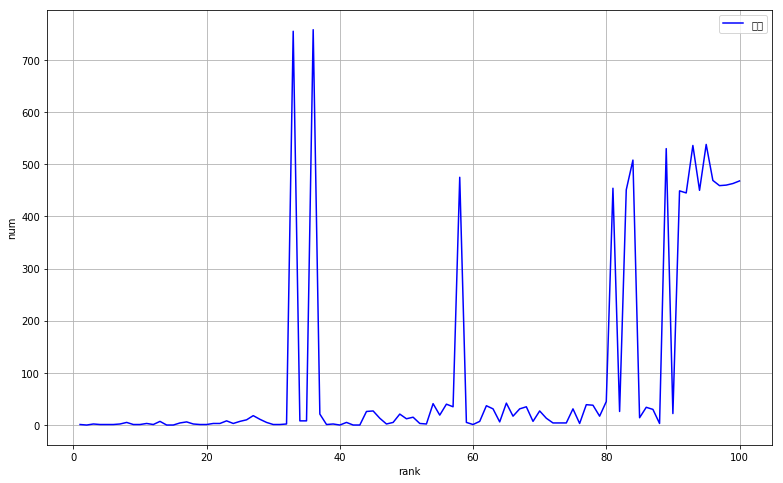

In [8]:
plt.figure(figsize=(13,8))
plt.plot(df['순위'], df['등락'],color='blue',markersize=12)
plt.grid()
plt.legend()
plt.xlabel('rank')
plt.ylabel('num')
plt.show()